# Aula 01 - Explorar dados com Pandas

In [1]:
import pandas as pd #biblioteca comum em análise de dados
import numpy as np

In [2]:
#df é a prática para dataframe, base de dados tá no Kaggle
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
# atributo que traz a dimensão do arquivo em linhas e colunas
# 133349 linhas e 11 colunas
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape
print("Nº de linhas: ", linhas)
print("Nº de colunas: " , colunas)

Nº de linhas:  133349
Nº de colunas:  11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
#Código gerado por IA:
# Dicionário de tradução para Português de Portugal
traducao = {
	'work_year': 'ano',
	'experience_level': 'experiencia',
	'employment_type': 'contrato',
	'job_title': 'cargo',
	'salary': 'salario',
	'salary_currency': 'moeda',
	'salary_in_usd': 'usd',
	'employee_residence': 'residencia',
	'remote_ratio': 'remoto',
	'company_location': 'empresa',
	'company_size': 'tamanho_empresa'
}

# Renomear as colunas
df.rename(columns=traducao, inplace=True)

# Visualizar as novas colunas
df.columns

Index(['ano', 'experiencia', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [10]:
# Nível de experiência mais frequente
df["experiencia"].value_counts()

experiencia
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

SE -> Senior
MI -> Medium
EN -> Junior
EX -> Executivo

In [11]:
# contrato mais frequente
df["contrato"].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

FT -> Full-Time
CT -> Contrato Temporário
PT -> Part-Time
FL -> Freelance

In [12]:
# % de remoto 
df["remoto"].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

Maioria dos cxontratos são presenciais, alguns em remoto mas poucos em híbrido.

In [13]:
# Traduzir as categorias da coluna 'experiencia'
experiencia = {
	'SE': 'Senior',
	'MI': 'Medio',
	'EN': 'Junior',
	'EX': 'Executivo'
}

df['experiencia'] = df['experiencia'].replace(experiencia)
# ou em vez de replace(), usar o map()

# Verificar a tradução
df['experiencia'].head()

0    Senior
1    Senior
2     Medio
3     Medio
4    Junior
Name: experiencia, dtype: object

In [14]:
# Traduzir as categorias da coluna 'contrato'
contrato_traducao = {
	'FT': 'Tempo Integral',
	'CT': 'Contrato Temporário',
	'PT': 'Tempo Parcial',
	'FL': 'Freelance'
}

df['contrato'] = df['contrato'].replace(contrato_traducao)

# Verificar a tradução
df['contrato'].value_counts()

contrato
Tempo Integral         132563
Contrato Temporário       394
Tempo Parcial             376
Freelance                  16
Name: count, dtype: int64

In [15]:
# Traduzir as categorias da coluna 'tamanho_empresa'
tamanho_empresa_traducao = {
	'S': 'Pequena',
	'M': 'Media',
	'L': 'Grande'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa_traducao)

# Verificar a tradução
df['tamanho_empresa'].value_counts()

tamanho_empresa
Media      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [16]:
# Traduzir as categorias da coluna 'remoto'
remoto_traducao = {
	0: 'Presencial',
	50: 'Hibrido',
	100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(remoto_traducao)

# Verificar a tradução
df['remoto'].value_counts()

remoto
Presencial    105312
Remoto         27718
Hibrido          319
Name: count, dtype: int64

In [17]:
df.head()

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Medio,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Medio,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [18]:
# o freq é quantas vezes o top apareceu
df.describe(include="object")

,experiencia,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Aula 02 - Limpar e preparar dados

In [19]:
df.isnull()

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# identificar nde podem haver os valores em falta
df.isnull().sum()

ano                10
experiencia         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

: somou tudo o que era nulo e encontrou 10 campos sem o valor ano

In [21]:
df["ano"].unique() # valores únicos da coluna "ano"

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [22]:
df[df.isnull().any(axis=1)] 

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Medio,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Medio,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Medio,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [23]:
#Criar um dataframe
df_salarios = pd.DataFrame({
    'nome':['Ana', 'Rita', 'Simão', 'Irina', 'Hugo', 'Ricaço'],
    'salario':[5000, np.nan, 5000, 1500, 1500, 20000]
})

# criar coluna e preencher os valores nulos com a média e arredonda
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

df_salarios.head()

,nome,salario,salario_media
0,Ana,5000.0,5000.0
1,Rita,NaN,6600.0
2,Simão,5000.0,5000.0
3,Irina,1500.0,1500.0
4,Hugo,1500.0,1500.0


In [24]:
# criar coluna e preencher os valores nulos com a mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

In [25]:
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,5000.0,5000.0,5000.0
1,Rita,NaN,6600.0,5000.0
2,Simão,5000.0,5000.0,5000.0
3,Irina,1500.0,1500.0,1500.0
4,Hugo,1500.0,1500.0,1500.0
5,Ricaço,20000.0,20000.0,20000.0


In [26]:
df_temperaturas = pd.DataFrame({
    'dia':['segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado', 'domingo'],
    'temperatura':[30, np.nan, np.nan, 28, 27, 25, 28]
})

# criar coluna e usar ffill para completar com o valor anterior (ff -> forward fill)
df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,segunda,30.0,30.0
1,terca,NaN,30.0
2,quarta,NaN,30.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0
5,sabado,25.0,25.0
6,domingo,28.0,28.0


In [27]:
df_temperaturas = pd.DataFrame({
    'dia':['segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado', 'domingo'],
    'temperatura':[30, np.nan, np.nan, 28, 27, 25, 28]
})

# criar coluna e usar bfill para completar com o valor posterior (bf -> backward fill)
df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_bfill
0,segunda,30.0,30.0
1,terca,NaN,28.0
2,quarta,NaN,28.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0
5,sabado,25.0,25.0
6,domingo,28.0,28.0


In [28]:
#Criar um dataframe
df_cidades = pd.DataFrame({
    'nome':['Ana', 'Rita', 'Simão', 'Irina', 'Hugo', 'Ricaço'],
    'cidades':['Setúbal', np.nan, 'Setúbal', 'Pinhal Novo', 'Lisboa', np.nan]
})

# criar coluna e usar fillna para completar com o valor "Não definido" 
df_cidades['cidades_preenchidas'] = df_cidades['cidades'].fillna("Não definido")

df_cidades

,nome,cidades,cidades_preenchidas
0,Ana,Setúbal,Setúbal
1,Rita,NaN,Não definido
2,Simão,Setúbal,Setúbal
3,Irina,Pinhal Novo,Pinhal Novo
4,Hugo,Lisboa,Lisboa
5,Ricaço,NaN,Não definido


In [29]:
df_limpo = df.dropna()

In [30]:
df_limpo.isnull().sum()

ano                0
experiencia        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [31]:
df_limpo.head()

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Medio,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Medio,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   experiencia      133349 non-null  object 
 2   contrato         133349 non-null  object 
 3   cargo            133349 non-null  object 
 4   salario          133349 non-null  int64  
 5   moeda            133349 non-null  object 
 6   usd              133349 non-null  int64  
 7   residencia       133349 non-null  object 
 8   remoto           133349 non-null  object 
 9   empresa          133349 non-null  object 
 10  tamanho_empresa  133349 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 11.2+ MB


In [33]:
# mudar o tipo da coluna ano de float para int
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [34]:
df_limpo.head()

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Medio,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Medio,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


# Aula 03 - Criar gráficos e contar histórias com dados

In [35]:
df_limpo.head()

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Medio,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Medio,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


<Axes: title={'center': 'Distribuição de experiência'}, xlabel='experiencia'>

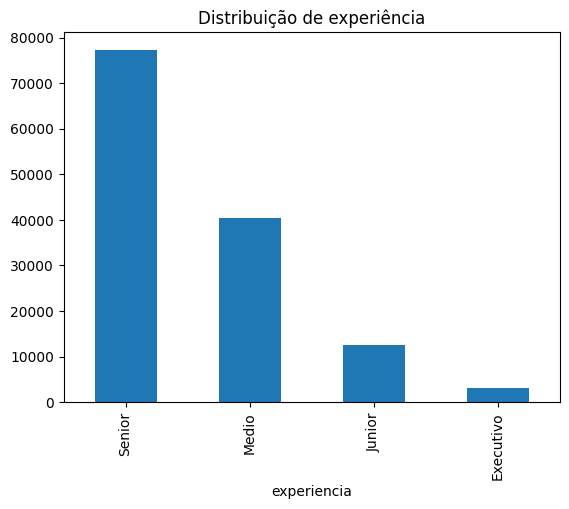

In [36]:
# grafico com pandas, kind é o tipo de gráfico e title é o título, plot para plotar
df_limpo['experiencia'].value_counts().plot(kind='bar', title='Distribuição de experiência')

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='experiencia', ylabel='usd'>

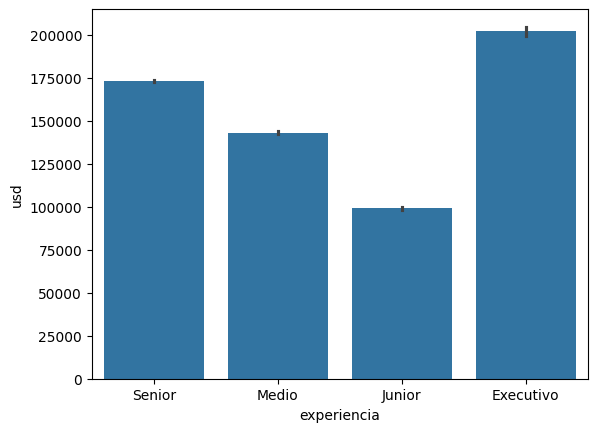

In [38]:
# média dos salários para cada uma das categorias
sns.barplot(data=df_limpo, x='experiencia', y='usd')

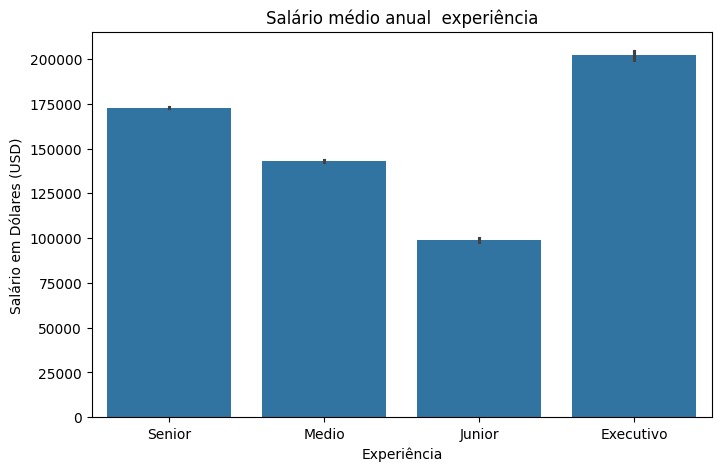

In [39]:
# matplotlib.pyplot e seaborn para visualização
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='experiencia', y='usd')
plt.title('Salário médio anual  experiência')
plt.xlabel('Experiência')
plt.ylabel('Salário em Dólares (USD)')
plt.show()

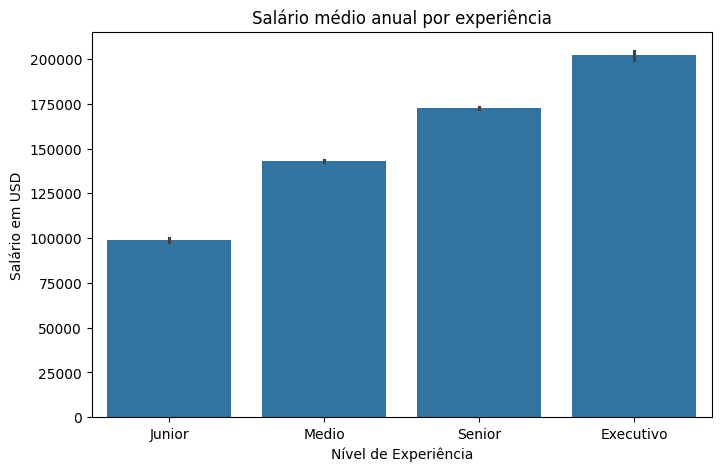

In [40]:
# Ordenar com groupby, sort_values e indexar na variável
ordem = df_limpo.groupby('experiencia')['usd'].mean().sort_values(ascending=True).index
plt.figure(figsize=(8, 5))
sns.barplot(df_limpo, x='experiencia', y='usd', order=ordem)
plt.title('Salário médio anual por experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.show()

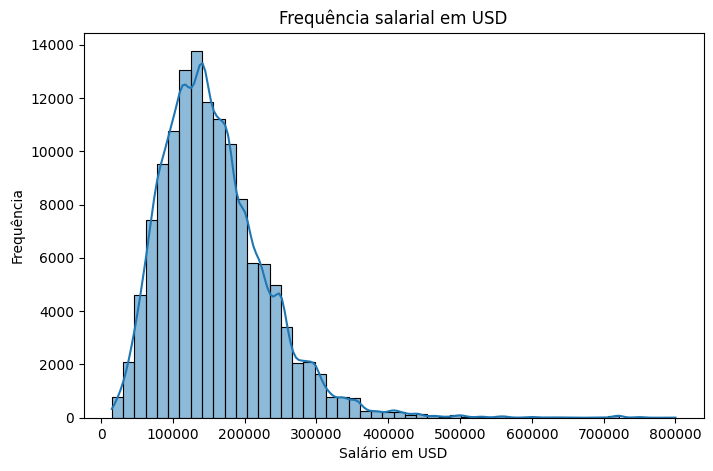

In [41]:
# Histograma com a frequência salarial em USD
plt.figure(figsize=(8, 5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True) # bins distribui os valores em 50 barras, kde faz a linha azul
plt.title('Frequência salarial em USD')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

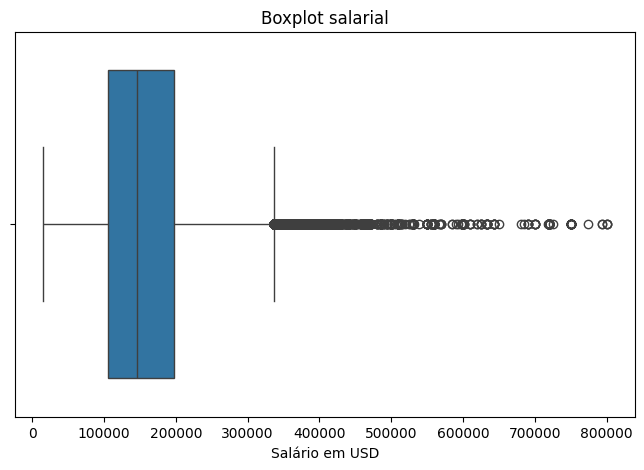

In [42]:
"""
Boxplot, este mostra a distribuição com caixas

Cada extremidade refere-se à variância, valor mínimo e ao máximo.
Alinha no meio é a mediana, a de tras é o quartil de 25% e o da frente é o de 75%

Acima da extremidade da direita os pontos representam os outliers
"""
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot salarial')
plt.xlabel('Salário em USD')
plt.show()

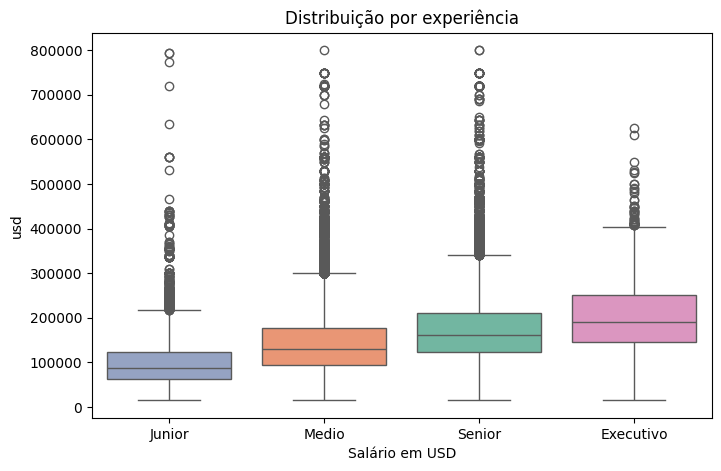

In [43]:
# Ordenação em boxplot para cada nível de experiência
ordem_experiencia = ['Junior', 'Medio', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='experiencia', y='usd', data=df_limpo, order=ordem_experiencia, palette='Set2', hue='experiencia')
plt.title('Distribuição por experiência')
plt.xlabel('Salário em USD')
plt.show()

In [44]:
# Criar gráficos interativos
import plotly.express as px

In [45]:
media_salario = df_limpo.groupby('experiencia')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
	media_salario,
	x='experiencia',
	y='usd',
	title='Salário médio por experiência',
	labels={'experiencia': 'Experiência', 'usd': 'Salário médio (USD)'}
)
fig.show()

In [46]:
# Pie chart de pizza de proporção de tipo de trabalho
remoto_cont = df_limpo['remoto'].value_counts().reset_index()
remoto_cont.columns = ['tipo_trabalho', 'quantidade']

figura = px.pie(
	remoto_cont,
	names='tipo_trabalho',
 values='quantidade',
	title='Proporção dos tipos de trabalho'
)
figura.show()

In [47]:
# Pie chart de donut de proporção de tipo de trabalho
remoto_cont = df_limpo['remoto'].value_counts().reset_index()
remoto_cont.columns = ['tipo_trabalho', 'quantidade']

figura = px.pie(
	remoto_cont,
	names='tipo_trabalho',
 values='quantidade',
	title='Proporção dos tipos de trabalho',
 hole=0.5
)
figura.update_traces(textinfo='percent+label') #coloca as labels e a percentagem no gráfico
figura.show()

# Aula 04 - Dashboard Interativo com Streamlit

In [ ]:
# pip install pycountry
import pycountry

# funcao para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None
    
df_limpo['residencia_iso3']	 = df_limpo['residencia'].apply(iso2_to_iso3)		

# calcular media salarial por país
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# gerar o mapa
fig = px.choropleth(media_pais, 
                    locations='residencia_iso3', 
                    color='usd', 
                    color_continuous_scale='rdylgn',
                    title='Salario medio', 
                    labels={'usd':"Salário médio (USD)", 'residencia_iso3' : 'País'})

fig.show()

In [51]:
df_limpo

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media,USA
2,2025,Medio,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media,AUS
3,2025,Medio,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande,USA
133345,2021,Medio,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande,USA
133346,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena,USA
133347,2020,Junior,Contrato Temporário,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande,USA


In [53]:
# Exportar os dados limpos
df_limpo.to_csv('dados_limpos.csv', index=False)